In [1]:
import os
path = 'C:/pytest/'
os.chdir(path)

In [2]:
DATA_OUT_PATH = path + 'data/'
model_name = 'transformer'

In [3]:
import pandas as pd
data = pd.read_csv(path + 'chatdata_small.csv',names=['Q','A','label'], sep= ',', header = 0, encoding= 'cp949')

In [4]:
len(data)

19

In [5]:
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [6]:
inputs, outputs = list(data['Q']), list(data['A'])
print(inputs, outputs , sep = '\n')

['12시 땡!', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네', 'SD카드 망가졌어', 'SD카드 안돼', 'SNS 맞팔 왜 안하지ㅠㅠ', 'SNS 시간낭비인 거 아는데 매일 하는 중', 'SNS 시간낭비인데 자꾸 보게됨', 'SNS보면 나만 빼고 다 행복해보여', '가끔 궁금해', '가끔 뭐하는지 궁금해', '가끔은 혼자인게 좋다', '가난한 자의 설움', '가만 있어도 땀난다', '가상화폐 쫄딱 망함', '가스불 켜고 나갔어', '가스불 켜놓고 나온거 같아']
['하루가 또 가네요.', '위로해 드립니다.', '여행은 언제나 좋죠.', '여행은 언제나 좋죠.', '눈살이 찌푸려지죠.', '다시 새로 사는 게 마음 편해요.', '다시 새로 사는 게 마음 편해요.', '잘 모르고 있을 수도 있어요.', '시간을 정하고 해보세요.', '시간을 정하고 해보세요.', '자랑하는 자리니까요.', '그 사람도 그럴 거예요.', '그 사람도 그럴 거예요.', '혼자를 즐기세요.', '돈은 다시 들어올 거예요.', '땀을 식혀주세요.', '어서 잊고 새출발 하세요.', '빨리 집에 돌아가서 끄고 나오세요.', '빨리 집에 돌아가서 끄고 나오세요.']


In [7]:
# ouputs 시작기호와 종료기호 부착
# 데이터 3종이 필요
# source 언어 : encoder_input 1개 , target 언어 : decoder_input, decoder_target 2개
# decoder_input 데이터의 시작에는 <sos>,  문장 끝에는 <eos>를 부착
# decoder_target 데이터에는 <eos> 만 필요
# 어절 분리가 되도록 <sos> 뒤에 공백, <eos> 앞에 공백을 둠
outputs_input = data.A.apply(lambda x: '<SOS> '+x+' <EOS>')
outputs_target = data.A.apply(lambda x : x+ ' <EOS>')

In [8]:
print(outputs_input.sample(5), outputs_target.sample(5))

5      <SOS> 다시 새로 사는 게 마음 편해요. <EOS>
9           <SOS> 시간을 정하고 해보세요. <EOS>
17    <SOS> 빨리 집에 돌아가서 끄고 나오세요. <EOS>
2             <SOS> 여행은 언제나 좋죠. <EOS>
12          <SOS> 그 사람도 그럴 거예요. <EOS>
Name: A, dtype: object 2             여행은 언제나 좋죠. <EOS>
17    빨리 집에 돌아가서 끄고 나오세요. <EOS>
18    빨리 집에 돌아가서 끄고 나오세요. <EOS>
12          그 사람도 그럴 거예요. <EOS>
6      다시 새로 사는 게 마음 편해요. <EOS>
Name: A, dtype: object


In [9]:
# Data Tokenizing
# 각 단어의 종류에 대해서 숫자값을 배당
# 같은 언어 사이에서의 번역이므로, 어휘 목록을 구성하는 토크나이저는 하나만 필요
# inputs 와 outputs를 결합
from tensorflow.keras.preprocessing.text import Tokenizer
inputs_series = pd.Series(inputs)
inputs_outputs = pd.concat([inputs_series, outputs_input], axis = 0)

tokenizer = Tokenizer(num_words= None, char_level=False, lower= False)
tokenizer.fit_on_texts(inputs_outputs)
word_index = tokenizer.word_index

print(len(word_index), word_index)

100 {'SOS': 1, 'EOS': 2, 'SNS': 3, '다시': 4, '거예요': 5, '3박4일': 6, '놀러가고': 7, '싶다': 8, 'SD카드': 9, '가끔': 10, '궁금해': 11, '가스불': 12, '여행은': 13, '언제나': 14, '좋죠': 15, '새로': 16, '사는': 17, '게': 18, '마음': 19, '편해요': 20, '시간을': 21, '정하고': 22, '해보세요': 23, '그': 24, '사람도': 25, '그럴': 26, '빨리': 27, '집에': 28, '돌아가서': 29, '끄고': 30, '나오세요': 31, '12시': 32, '땡': 33, '1지망': 34, '학교': 35, '떨어졌어': 36, '정도': 37, 'PPL': 38, '심하네': 39, '망가졌어': 40, '안돼': 41, '맞팔': 42, '왜': 43, '안하지ㅠㅠ': 44, '시간낭비인': 45, '거': 46, '아는데': 47, '매일': 48, '하는': 49, '중': 50, '시간낭비인데': 51, '자꾸': 52, '보게됨': 53, 'SNS보면': 54, '나만': 55, '빼고': 56, '다': 57, '행복해보여': 58, '뭐하는지': 59, '가끔은': 60, '혼자인게': 61, '좋다': 62, '가난한': 63, '자의': 64, '설움': 65, '가만': 66, '있어도': 67, '땀난다': 68, '가상화폐': 69, '쫄딱': 70, '망함': 71, '켜고': 72, '나갔어': 73, '켜놓고': 74, '나온거': 75, '같아': 76, '하루가': 77, '또': 78, '가네요': 79, '위로해': 80, '드립니다': 81, '눈살이': 82, '찌푸려지죠': 83, '잘': 84, '모르고': 85, '있을': 86, '수도': 87, '있어요': 88, '자랑하는': 89, '자리니까요': 90, '혼자를': 91, '즐기세요': 92, '돈은': 93, '

In [10]:
import pickle

if os.path.exists(DATA_OUT_PATH + model_name):
    print('{} -- Folder already exists \n'.format(DATA_OUT_PATH))
else:
    os.makedirs(DATA_OUT_PATH + model_name, exist_ok = True)
    print('Folder create complete \n')

with open(DATA_OUT_PATH + model_name + '/transformer.pickle','wb') as file:
    pickle.dump(tokenizer, file, protocol= pickle.HIGHEST_PROTOCOL)

C:/pytest/data/ -- Folder already exists 



In [11]:
# Data Sequencing
# 배당된 숫자를 이용하여 각 문장의 문자를 숫자로 치환
# source 언어 Sequencing
encoder_input = tokenizer.texts_to_sequences(list(inputs))
print(inputs[0], encoder_input[0])
print(inputs[1], encoder_input[1])
print(inputs[2], encoder_input[2])

12시 땡! [32, 33]
1지망 학교 떨어졌어 [34, 35, 36]
3박4일 놀러가고 싶다 [6, 7, 8]


In [12]:
# target 언어 Sequencing
decoder_input = tokenizer.texts_to_sequences(list(outputs_input))
decoder_target = tokenizer.texts_to_sequences(list(outputs_target))

print(outputs_input[0], decoder_input[0])

print(outputs_target[0], decoder_target[0])

<SOS> 하루가 또 가네요. <EOS> [1, 77, 78, 79, 2]
하루가 또 가네요. <EOS> [77, 78, 79, 2]


In [13]:
# 문장의 maxlen 설정
# source와 target 문장 모두에서의 최대 길이 구하기
sentence_max_length = inputs_outputs.apply(lambda x : len(x.split())).max()

In [14]:
sentence_max_length

8

In [15]:
# Data Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoder_input_pad = pad_sequences(encoder_input, maxlen= sentence_max_length, padding='post')
decoder_input_pad = pad_sequences(decoder_input, maxlen= sentence_max_length, padding='post')
decoder_target_pad = pad_sequences(decoder_target, maxlen= sentence_max_length, padding= 'post')

In [16]:
transformer_dict = {
    'encoder_input_pad': encoder_input_pad,
    'decoder_input_pad': decoder_input_pad,
    'decoder_target_pad': decoder_target_pad,
    'sentence_max_length': sentence_max_length
}

In [17]:
with open('C:/pytest/data/transformer/transformer_dict.pickle', 'wb') as f:
    pickle.dump(transformer_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
print(encoder_input_pad.shape)
print(inputs[1])
print(encoder_input[1])
print(encoder_input_pad[1])

print(decoder_input_pad.shape)
print(outputs_input[1])
print(decoder_input[1])
print(decoder_input_pad[1])

print(decoder_target_pad.shape)
print(outputs_target[1])
print(decoder_target[1])
print(decoder_target_pad[1])

(19, 8)
1지망 학교 떨어졌어
[34, 35, 36]
[34 35 36  0  0  0  0  0]
(19, 8)
<SOS> 위로해 드립니다. <EOS>
[1, 80, 81, 2]
[ 1 80 81  2  0  0  0  0]
(19, 8)
위로해 드립니다. <EOS>
[80, 81, 2]
[80 81  2  0  0  0  0  0]


In [19]:
import tensorflow as tf
import numpy as np
import enum
import re
import json

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [20]:
# 랜덤 시드 사용
# 실제에서는 이부분을 제외
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

In [21]:
# 문장 특수 기호 처리
PAD_INDEX = 0
STD_INDEX = 1
END_INDEX = 2

# 변수명 변경
index_inputs = encoder_input_pad
index_outputs = decoder_input_pad
index_targets = decoder_target_pad

# prepro_configs (preprocessing configurations)
char2idx_dict = word_index
idx2char_dict = {y:x for x,y in word_index.items()}

In [22]:
# dictionary 추가 및 변경
# dict_ex[new_key] = dict_ex[old_key]
# del dict_ex[old_key]
char2idx_dict['<PAD>'] = 0 # padding 값 설정

char2idx_dict['<SOS>'] = char2idx_dict['SOS']
del char2idx_dict['SOS']

char2idx_dict['<END>'] = char2idx_dict['EOS']
del char2idx_dict['EOS']

idx2char_dict[0] = '<PAD>'
idx2char_dict[1] = '<SOS>'
idx2char_dict[2] = '<END>'

In [23]:
prepro_configs = dict({'char2idx': char2idx_dict, 'idx2char': idx2char_dict, 
                      'vocab_size': len(word_index), 'pad_symbol':'<PAD>','std_symbol':'<SOS>',
                      'end_symbol': '<END>'})
print(prepro_configs)

{'char2idx': {'SNS': 3, '다시': 4, '거예요': 5, '3박4일': 6, '놀러가고': 7, '싶다': 8, 'SD카드': 9, '가끔': 10, '궁금해': 11, '가스불': 12, '여행은': 13, '언제나': 14, '좋죠': 15, '새로': 16, '사는': 17, '게': 18, '마음': 19, '편해요': 20, '시간을': 21, '정하고': 22, '해보세요': 23, '그': 24, '사람도': 25, '그럴': 26, '빨리': 27, '집에': 28, '돌아가서': 29, '끄고': 30, '나오세요': 31, '12시': 32, '땡': 33, '1지망': 34, '학교': 35, '떨어졌어': 36, '정도': 37, 'PPL': 38, '심하네': 39, '망가졌어': 40, '안돼': 41, '맞팔': 42, '왜': 43, '안하지ㅠㅠ': 44, '시간낭비인': 45, '거': 46, '아는데': 47, '매일': 48, '하는': 49, '중': 50, '시간낭비인데': 51, '자꾸': 52, '보게됨': 53, 'SNS보면': 54, '나만': 55, '빼고': 56, '다': 57, '행복해보여': 58, '뭐하는지': 59, '가끔은': 60, '혼자인게': 61, '좋다': 62, '가난한': 63, '자의': 64, '설움': 65, '가만': 66, '있어도': 67, '땀난다': 68, '가상화폐': 69, '쫄딱': 70, '망함': 71, '켜고': 72, '나갔어': 73, '켜놓고': 74, '나온거': 75, '같아': 76, '하루가': 77, '또': 78, '가네요': 79, '위로해': 80, '드립니다': 81, '눈살이': 82, '찌푸려지죠': 83, '잘': 84, '모르고': 85, '있을': 86, '수도': 87, '있어요': 88, '자랑하는': 89, '자리니까요': 90, '혼자를': 91, '즐기세요': 92, '돈은': 93, '들어올': 94, '

In [24]:
char2idx = prepro_configs['char2idx']
end_index = prepro_configs['end_symbol']
vocab_size = prepro_configs['vocab_size']
BATCH_SIZE = 2 
MAX_SEQUENCE = 25
EPOCHS = 30
VALID_SPLIT = 0.1

In [25]:
kargs = {'model_name': model_name,
         'num_layers': 2,
         'd_model': 512, # 단어의 차원 = 임베딩 dimension
         'num_heads':8,
         'dff': 2048, # 출력층의 노드 수
         'input_vocab_size': vocab_size, # 단어 사전의 수
         'target_vocab_size': vocab_size, # 단어 사전의 수
         'maximum_position_encoding': MAX_SEQUENCE, # 포지션 인코더의 최대 시퀀스 길이
         'end_token_idx': char2idx[end_index], # 종료 표지의 인덱스
         'rate' : 0.1 # Dropout에 사용되는 비율
        }

In [26]:
# 순방향 마스크
# seq의 값이 padding 0일 때만 1.0을 출력하고, 그 외에는 0을 출력하는 함수
# 마스킹 대상을 1.0으로 만든다. 이후 -1e9라는 작은 수를 곱하고
# 후에 softmax() 함수를 거쳐 값을 역전
# 입력 2D -> return 4D
def create_padding_mask(seq):
    # seq 값이 0이면 1(true)를 출력하여  mask에 할당
    mask = tf.cast(tf.math.equal(seq,0), tf.float32)
    # 1D -> 3D로
    return mask[:,tf.newaxis, tf.newaxis,:]

In [27]:
# 삼각 행렬 만들기
# 우삼각 부분만 1로 마스킹 영역을 표시
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1,0) # 하삼각행렬
    # 하삼각행렬을 만든 후 1에서 빼서 역전시켜 상삼각 행렬을 만듦
    return mask
# create_padding_mask와 look_ahead_mask는 비슷한 모양
# 자신의 뒤에 있는 단어나 패딩을 받는 부분은 보지 않기 위한 코드

In [28]:
def create_masks(inp, tar): # (Encoder input, Decoder input)
    # combined_mask 만드는 과정
    enc_padding_mask = create_padding_mask(inp) # 인코더 패딩 마스크
    dec_padding_mask = create_padding_mask(inp) # 디코더 두 번째 어텐션 블록에서 사용
    
    # 디코더의 첫 번째 어텐션 블록에서 사용되는 마스크
    # 디코더가 받은 데이터를 패딩 처리 이후 순방향 마스킹을 하여 뒷 단어가 
    # 참고되지 않도록 함
    # combined_mask = look_ahead_mask 라는 이름으로 사용
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask,look_ahead_mask)
                            # padding mask, subsequent mask
    
    return enc_padding_mask, combined_mask, dec_padding_mask
    # 인코더 input 마스크(pad), 디코더 첫 번째 어텐션 마스크, 두 번째 어텐션 마스크(pad)
                            # pad와 subse 중 해당되는 것으로 mask

In [29]:
# index_inputs : encoder_input_pad
# index_ouputs : decoder_input_pad
enc_padding_mask, look_ahead_mask, dec_padding_mask = create_masks(index_inputs, index_outputs)

In [30]:
# Positional Encoding
def get_angles(pos,i, d_model):
    # post: 각 문장의 단어 길이만큼의 공간, 단어의 위치 정보 
    # i : 각 단어가 갖는 차원 만큼의 공간, 단어의 정보를 기록할 공간
    # d_model : 단어 차원 수 (현재 512)
    angle_rates = 1/np.power(10000,(2*i//2)/np.float32(d_model))
    # 각 단어의 표현 공간에 위치 정보
    return pos * angle_rates

In [31]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:,np.newaxis],
                           np.arange(d_model)[np.newaxis,:],
                           d_model)
    # 인덱스가 짝수인 경우 sin, 홀수인 경우 cos
    angle_rads[:,0::2] = np.sin(angle_rads[:,0::2])
    # 0번 부터 2개씩 건너뛰어 sin함수 적용
    angle_rads[:,1::2] = np.cos(angle_rads[:,1::2])
    # 1번 부터 2개씩 건너뛰어 cos함수 적용
    pos_encoding = angle_rads[np.newaxis,...]
    # ... : angle_rads의 차원을 그대로 가져옴
    
    return tf.cast(pos_encoding, dtype = tf.float32)

In [32]:
def scaled_dot_product_attention(q,k,v,mask):
    matmul_qk = tf.matmul(q,k, transpose_b = True)# : attention score
    # Q행렬과 전치된 K행렬을 내적 연산
    # transpose_b : 두 번째 입력에 대해 전치 결정
    # K 행렬의 차원 수 (열의 수)를 구한다.
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    # Key 벡터의 차원 수의 제곱근으로 나누어 크기를 줄임
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
    
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
    
    # softmax 함수를 거쳐 매우작은 값은 0으로 마스킹 됨(우삼각)
    # 자신보다 뒤에 나오는 단어는 참조하지 못함
    # 그 외의 양의 값은 확률 정보가 됨(하삼각)
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis = -1)
    # 패딩 마스크 순방향 마스크를 받을 부분은 -> 0
    # 단어가 있는 자리는 양수 값을 기준
    # 확률 값 Attention Score에 Value 벡터로 가중합을 수행
    output = tf.matmul(attention_weights,v)
    return output, attention_weights

In [33]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super().__init__() # 부모의 기능 가져오기, Layers 클래스의 메서드 가져오기
        self.num_heads = kargs['num_heads'] # 어텐션 헤드 수 8
        self.d_model = kargs['d_model'] # 단어의 차원 수 512
        
        # assert구문은 문제 발생 시 알림 역할
        assert self.d_model % self.num_heads ==0
        # d_model의 차원 수는 헤드의 개수로 나머지 없이 나뉘어야 함
        
        self.depth = self.d_model // self.num_heads
        # 각 헤드에 입력될 벡터의 차원 수를 둘을 나눈 몫으로 결정
        
        # query, key, value 가중치 레이어 설정
        # input 결과를 받을 수 있도록 차원 수를 동일하게
        self.wq = tf.keras.layers.Dense(kargs['d_model'])
        self.wk = tf.keras.layers.Dense(kargs['d_model'])
        self.wv = tf.keras.layers.Dense(kargs['d_model'])
        
        # 셀프 어텐션 결과를 출력하기 위한 레이어
        self.dense = tf.keras.layers.Dense(kargs['d_model'])
        
    # 각 배치 사이즈마다 데이터가 [seq_len X depth]로 되어 있는 것을
    # [num_heads X seq_len X depth]로 변환, 헤드 수 만큼 분리하는 함수
    # (depth == d_model == 임베딩 차원)
    def split_heads(self, x, batch_size):
        # (batch_size, seq_len, depth) -> (batch_size, seq_len, num_heads, depth)
        # seq_len는 -1로 표기하여 자동 배정
        # 숫자가 기입된 부분의 축을 변환하고 난 뒤 남은 축의 형태는 원래 텐서의
        # 총 크기와 같도록 자동으로 결정
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))

        # (batch_size, num_heads, seq_len, depth)로 치환
        return tf.transpose(x, perm = [0,2,1,3])
        
    # fit단계(훈련)에서 실행되는 함수
    def call(self, v,k,q,mask):
        batch_size = tf.shape(q)[0] # batch size를 구함
        
        # (batch_size, seq_len, d_model)
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
        
        # (batch_size, num_heads, seq_len, depth)
        # num_heads 별로 depth(임베딩 차원)를 갖게함
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        
        # 스케일 내적 어텐션 수행
        scaled_attention, attention_weights = scaled_dot_product_attention(q,k,v,mask)
        scaled_attention = tf.transpose(scaled_attention, perm = [0,2,1,3])
        
        # 4D -> 3D 변환 (batch_size, seq_len, d_model)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        # 가중합 (어텐션 결과)
        
        output = self.dense(concat_attention)
        
        # attention_weigth : softmax를 거친 확률 정보
        # 어텐션을 얼마나 적용시킬 것인지에 대한 정보
        return output, attention_weights

In [34]:
# Position-wise Feed Forward Network
def feed_forward_network(**kargs):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(kargs['dff'], activation ='relu'),
        tf.keras.layers.Dense(kargs['d_model'])
    ])

In [35]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super().__init__()
        self.mha = MultiHeadAttention(**kargs)
        self.ffn = feed_forward_network(**kargs)
        
        # 층 정규화(Layer Normalization)
        # LayerNormalization은 같은 층별로 평균을 0, 표준편차 1로 정규화
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)
        
        # Dropout 레이어 생성
        self.dropout1 = tf.keras.layers.Dropout(kargs['rate'])
        self.dropout2 = tf.keras.layers.Dropout(kargs['rate'])
        
    def call(self,x, mask):
        attn_output, _ = self.mha(x,x,x,mask)
        # encoder_layer에서는 attention_weight를 받을 필요가 없음
        attn_output = self.dropout1(attn_output) # Dropout 수행
        out1 = self.layernorm1(x + attn_output) # Residual Connection & LayerNormalization
        
        ffn_output = self.ffn(out1) # out1에 대해 feed forward network
        ffn_output = self.dropout2(ffn_output) # 드롭아웃 수행
        out2 = self.layernorm2(out1 + ffn_output)
        return out2
    

In [36]:
# LayerNormalization example
# data = np.array([0.006,0.002,0.004,0.009,0.005,0.076,0.007,0.008,0.003])
# data = data.reshape(-1,3)
# print(data)
# layer = tf.keras.layers.LayerNormalization(axis = 1)
# output = layer(data)
# print(output)

# 디코더 레이어와 인코더 레이어
1. init()에서 인코더와 다르게 멀티 헤드 어텐션을 두 번 수행하기 위한 준비를 함
2. call()은 인코더의 결과를 받는 enc_output과 순방향 마스크 어텐션을 위해 look
    ahead_mask를 추가로 받음
3. call()에서 첫 번째 어텐션은 순방향 마스크 어텐션을 수행 (두 번째 어텐션을 동일한
    padding_mask)
4. call()에서 두 번째 어텐션은 v,k에 enc_output을 넣지만 q는 첫 번째 어텐션 결과
    를 넣는다.


+ 디코더의 query(직전 단어)와 인코더의 key(현재 단어)를 내적 연산(Q,K_transposed)하고, 그 결과에 대해 인코더의 value를 가중합 함
    + 뒷 단어가 무엇이 올지 알 수 없는 디코더의 입장에서는 context_vector로서 다음 단어를 예측할 수 있는 이코더의 정보를 활용 가능
    + 두 번째 어텐션에서는 뒤쪽을 보지 않는 순방향 마스크를 사용하면 안됨
    + 인코더처럼 패딩 마스크만 사용해야 함
+ 직전 단어의 내용을 참조하여 이번에 나올 단어가 무엇인지를 알게 해주는 것
Q : 찾고자 하는 단어 : 직전 단어
K : 사전에 등록된 단어 : 기학습된 내용을 참조하여 어떤 단어에 집중해야 (유사한지) 
알려주는 기능
V : 단어의 의미 : 현재 단어의 K의 내용을 적용

In [37]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super().__init__()
        
        self.mha1 = MultiHeadAttention(**kargs)
        self.mha2 = MultiHeadAttention(**kargs)
        self.ffn = feed_forward_network(**kargs)
        
        # 층 정규화
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)
        
        # Dropout 레이어 생성
        self.dropout1 = tf.keras.layers.Dropout(kargs['rate'])
        self.dropout2 = tf.keras.layers.Dropout(kargs['rate'])
        self.dropout3 = tf.keras.layers.Dropout(kargs['rate'])
        
    def call(self, x, enc_output, look_ahead_mask, padding_mask):
        attn1, attn_weights_block1 = self.mha1(x,x,x,look_ahead_mask)
        # look_ahead_mask : pad + subsequent, attn_weight_block1 : 확률로 된 어텐션 스코어
        # attn1 : 가중합, attention을 적용한 벡터
        attn1 = self.dropout1(attn1)
        out1 = self.layernorm1(attn1 + x) # 잔차 연결 및 층 정규화 수행
        
        # 멀티 헤드 어텐션 레이어 2 수행
                                                # k            v        q
        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2)
        out2 = self.layernorm2(attn2 + out1)
        
        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output)
        out3 = self.layernorm3(ffn_output +out2)
        
        return out3, attn_weights_block1, attn_weights_block2

In [38]:
# 인코더 모듈
class Encoder(tf.keras.layers.Layer):
    '''
        - 현재 단어의 임베딩 차원은 512, 사용할 인코더 레이어의 개수 2개
        - 워드 임베딩은 케라스 이용, Flatten하지 않아 input_length 불필요
        - 인코더 레이어 전체 연산 여러 번 반복
        - 드롭아웃 레이어는 옵션
    '''
    def __init__(self, **kargs):
        super().__init__()
        self.d_model = kargs['d_model'] # 단어 임베딩 차원
        self.num_layers = kargs['num_layers'] # 사용할 인코더 레이어 개수
        
        # 워드 임베딩 레이어 생성
        # input_dim, output_dim, input_length / input_length는 Flatten이 없으면 생략 가능
        self.embedding = tf.keras.layers.Embedding(input_dim = kargs['input_vocab_size'], output_dim = self.d_model)
        
        # 포지셔널 인코딩 레이어 생성
        self.pos_encoding = positional_encoding(position = kargs['maximum_position_encoding'], d_model = self.d_model)
        
        # 인코더 레이어 생성 num_layers 수만큼 리스트 배열로 만든다
        self.enc_layers = [EncoderLayer(**kargs) for _ in range(self.num_layers)]
        
        # 드롭아웃 레이어 생성
        self.dropout = tf.keras.layers.Dropout(kargs['rate'])
    
    def call(self, x, mask):
        seq_len = tf.shape(x)[1]
        
        x = self.embedding(x)
        # 가중치 곱하기(옵션) 각 워드 임베딩에 대해 스케일을 맞추는 과정
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:,:seq_len, :]
        
        x = self.dropout(x)
        
        # 인코더 레이어 연산을 반복하는 부분
        # __init__()함수에서 생성된 복수의 인코더 레이어에 대하여 실제 수행
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, mask)
        return x

In [39]:
# 디코더 모듈
class Decoder(tf.keras.layers.Layer):
    '''
        두 번의 어텐션에서 나온 가중치를 block1과 block2로 받아 
        attention_weights에 묶어 출력한다.
        그러나 사용하지는 않음
    '''
    def __init__(self, **kargs):
        super().__init__()
        
        self.d_model = kargs['d_model']
        self.num_layers = kargs['num_layers']
        
        # 워드 임베딩 레이어 생성
        self.embedding = tf.keras.layers.Embedding(input_dim= kargs['target_vocab_size'], output_dim = self.d_model)
        
        # 포지셔널 인코딩 레이어 생성
        self.pos_encoding = positional_encoding(position= kargs['maximum_position_encoding'], d_model = self.d_model)
        
        # 디코더 레이어 생성, num_layers 수만큼 리스트 배열로 만듦
        self.dec_layers = [DecoderLayer(**kargs) for _ in range(self.num_layers)]
        
        # 드롭 아웃 레이어 생성
        self.dropout = tf.keras.layers.Dropout(kargs['rate'])
        
    def call(self, x, enc_output, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}
        
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:,:seq_len, :]
        
        x = self.dropout(x)
        
        for i in range(self.num_layers):
            # block1, block2 : attention score
            x, block1, block2 = self.dec_layers[i](x, enc_output, look_ahead_mask, padding_mask)
            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
            
        return x, attention_weights

In [40]:
# 트랜스포머 구현
class Transformer(tf.keras.Model):
    def __init__(self, **kargs):
        super().__init__(name = kargs['model_name'])
        self.end_token_idx = kargs['end_token_idx']
        
        self.encoder = Encoder(**kargs)
        self.decoder = Decoder(**kargs)
        
        self.final_layer = tf.keras.layers.Dense(kargs['target_vocab_size'])
    
    def call(self, x):
        inp, tar = x
        
        # 인코더 패딩 마스크, 디코더 순방향 마스크, 디코더 패딩 마스크 생성
        enc_padding_mask, look_ahead_mask, dec_padding_mask = create_masks(inp, tar)
        
        # 인코더 결과 출력 (batch_size, inp_seq_len, d_model)
        enc_output = self.encoder(inp, enc_padding_mask)
        
        # 디코더 결과 출력
        dec_output, _ = self.decoder(tar, enc_output, look_ahead_mask, dec_padding_mask)
        
        # batch_size, tar_seq_len, target_vocab_size
        final_output = self.final_layer(dec_output)
        
        return final_output
    
    def inference(self, x):
        inp = x
        tar = tf.expand_dims([STD_INDEX], axis = 0)
        enc_padding_mask, look_ahead_mask, dec_padding_mask = create_masks(inp, tar)
        
        enc_output = self.encoder(inp, enc_padding_mask)
        
        predict_tokens = list()
        for t in range(0, MAX_SEQUENCE):
            dec_output, _ = self.decoder(tar, enc_output, look_ahead_mask, dec_padding_mask)
            final_output = self.final_layer(dec_output)
            outputs = tf.argmax(final_output, axis = -1).numpy()
            print('outputs:',outputs)
            pred_token = outputs[0][-1]
            
            if pred_token == self.end_token_idx:
                break
            predict_tokens.append(pred_token)
            tar = tf.expand_dims([STD_INDEX]+ predict_tokens, axis=0)
            _, look_ahead_mask, dec_padding_mask = create_masks(inp, tar)
        return predict_tokens

In [41]:
# from_logits : True  softmax함수를 거친 값이 아닌 일반 값이 필요함
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'accuracy')

In [42]:
# 손실 함수 정의
# <PAD> 0은 손실값 계산에서 제외해야 하는데 일반 손실함수는 이를 예외로 두지 않아
# 새로 구현
def loss(real, pred):
    # 들어온 값이 0이면 True, 이를 False(0)로 변환하여 이후 계산에서 제외
    mask = tf.math.logical_not(tf.math.equal(real,0))
    
    loss_ = loss_object(real,pred)
    mask = tf.cast(mask, dtype = loss_.dtype)
    loss_ *= mask
    
    # reduce_mean : 차원을 감소시킴, 차원과 관계없이 요소들의 평균값을 계산
    return tf.reduce_mean(loss_)

In [43]:
# 정확도 함수 정의
def accuracy(real,pred):
    mask = tf.math.logical_not(tf.math.equal(real,0))
    mask = tf.expand_dims(tf.cast(mask, dtype = pred.dtype), axis = -1)
    pred *= mask
    acc = train_accuracy(real, pred)
    
    return tf.reduce_mean(acc)

In [44]:
model = Transformer(**kargs)
model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss = loss, metrics = [accuracy])

In [45]:
# EarlyStopping
earlystop_callback = EarlyStopping(monitor= 'val_accuracy', min_delta = 0.0001, patience = 10)

checkpoint_path = DATA_OUT_PATH + model_name + '/weights_cp'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print('already exists')
else:
    os.makedirs(checkpoint_dir, exist_ok= True)
    print('create complete')
    
checkpointer = ModelCheckpoint(checkpoint_path, monitor= 'val_accuracy', verbose = 1, save_best_only= True, save_weights_only=True)

already exists


In [46]:
history = model.fit([index_inputs, index_outputs], index_targets,
                   batch_size= BATCH_SIZE, epochs= EPOCHS,
                   validation_split=VALID_SPLIT, callbacks= [earlystop_callback, checkpointer])

Epoch 1/30
8/9 [=========================>....] - ETA: 0s - loss: 2.0262 - accuracy: 0.4380
Epoch 1: val_accuracy improved from -inf to 0.45395, saving model to C:/pytest/data/transformer\weights_cp
9/9 [==============================] - 14s 241ms/step - loss: 1.9973 - accuracy: 0.4424 - val_loss: 3.9542 - val_accuracy: 0.4539
Epoch 2/30
9/9 [==============================] - ETA: 0s - loss: 1.3463 - accuracy: 0.4678
Epoch 2: val_accuracy improved from 0.45395 to 0.48026, saving model to C:/pytest/data/transformer\weights_cp
9/9 [==============================] - 1s 135ms/step - loss: 1.3463 - accuracy: 0.4678 - val_loss: 3.8836 - val_accuracy: 0.4803
Epoch 3/30
9/9 [==============================] - ETA: 0s - loss: 0.9578 - accuracy: 0.4955
Epoch 3: val_accuracy improved from 0.48026 to 0.50219, saving model to C:/pytest/data/transformer\weights_cp
9/9 [==============================] - 1s 116ms/step - loss: 0.9578 - accuracy: 0.4955 - val_loss: 3.7837 - val_accuracy: 0.5022
Epoch 4/3

Epoch 26/30
9/9 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.8502
Epoch 26: val_accuracy improved from 0.84711 to 0.85046, saving model to C:/pytest/data/transformer\weights_cp
9/9 [==============================] - 1s 118ms/step - loss: 0.0037 - accuracy: 0.8502 - val_loss: 4.4878 - val_accuracy: 0.8505
Epoch 27/30
9/9 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.8534
Epoch 27: val_accuracy improved from 0.85046 to 0.85356, saving model to C:/pytest/data/transformer\weights_cp
9/9 [==============================] - 1s 138ms/step - loss: 0.0020 - accuracy: 0.8534 - val_loss: 4.5222 - val_accuracy: 0.8536
Epoch 28/30
9/9 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.8563
Epoch 28: val_accuracy improved from 0.85356 to 0.85644, saving model to C:/pytest/data/transformer\weights_cp
9/9 [==============================] - 1s 121ms/step - loss: 0.0028 - accuracy: 0.8563 - val_loss: 4.4935 - val_accuracy: 0.8564
E

In [47]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('EPOCHS')
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()

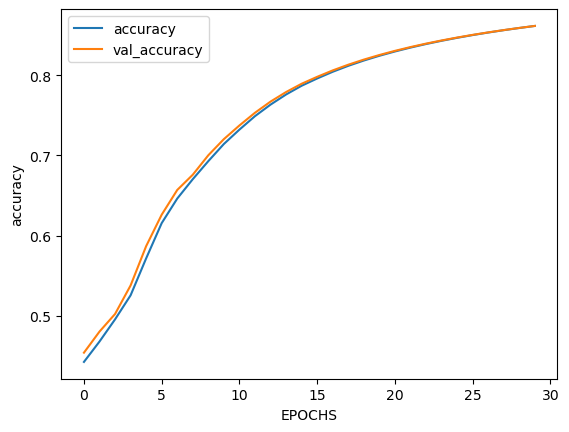

In [48]:
plot_graphs(history, 'accuracy')